In [63]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import graphviz 
from sklearn import tree

In [103]:
train_set = pandas.read_csv('mobile_train.csv')
train_set.rename(columns={"blue": "bluetooth","fc":"front_camera","m_dep":"mobile_depth","pc":"primary_camera","sc_h":"screen_height",
                  "sc_w":"screen_width"}, inplace=True)
train_set.columns=['battery_power','bluetooth', 'clock_speed',  'dual_sim',  'front_camera',   'four_g',   'int_memory', 'mobile_depth' ,'mobile_wt',  'n_cores', 'primary_camera','px_height', 'px_width' ,'ram', 'screen_height' ,'screen_width', 'talk_time', 'three_g', 'touch_screen' ,'wifi', 'price_range']
# print(train_set)
train_set.columns
# print(train_set.head(1))

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       'four_g', 'int_memory', 'mobile_depth', 'mobile_wt', 'n_cores',
       'primary_camera', 'px_height', 'px_width', 'ram', 'screen_height',
       'screen_width', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

In [104]:
train_set.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,mobile_depth,mobile_wt,n_cores,...,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [105]:
# columns information
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_camera    2000 non-null   int64  
 5   four_g          2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   mobile_depth    2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  screen_height   2000 non-null   int64  
 15  screen_width    2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [106]:
features = ['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera', 
            'four_g', 'int_memory', 'mobile_depth', 'mobile_wt', 'n_cores', 'primary_camera', 
            'px_height', 'px_width', 'ram', 'screen_height', 'screen_width', 'talk_time', 
            'three_g', 'touch_screen', 'wifi', 'price_range']


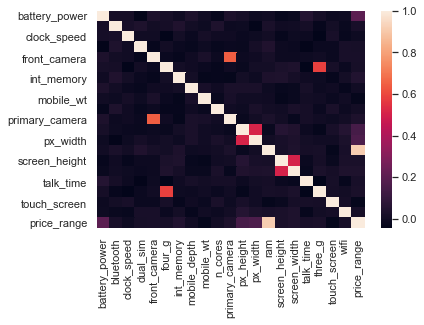

In [107]:
#correlation entre les donnees
sns.heatmap(train_set[features].corr())

In [108]:
#data processing
# feature = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 
#             'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 
#             'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 
#             'three_g', 'touch_screen', 'wifi', 'price_range']

label = 'price_range'
X = train_set.drop(['price_range'], axis=1) 
y = train_set[label]
X = normalize(X, norm='l2')
X

array([[3.01210304e-01, 0.00000000e+00, 7.87010296e-04, ...,
        0.00000000e+00, 0.00000000e+00, 3.57731953e-04],
       [2.85853425e-01, 2.79973972e-04, 1.39986986e-04, ...,
        2.79973972e-04, 2.79973972e-04, 0.00000000e+00],
       [1.64909268e-01, 2.92911666e-04, 1.46455833e-04, ...,
        2.92911666e-04, 2.92911666e-04, 0.00000000e+00],
       ...,
       [4.71497492e-01, 0.00000000e+00, 2.22055334e-04, ...,
        2.46728148e-04, 2.46728148e-04, 0.00000000e+00],
       [7.93911617e-01, 0.00000000e+00, 4.72566439e-04, ...,
        5.25073821e-04, 5.25073821e-04, 5.25073821e-04],
       [1.25738545e-01, 2.46546167e-04, 4.93092334e-04, ...,
        2.46546167e-04, 2.46546167e-04, 2.46546167e-04]])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 

In [110]:
#model
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
depth = model.get_depth()
nleaves = model.get_n_leaves()
print(f'depth of tree:{depth}')
print(f'number of leaves:{nleaves}')

depth of tree:17
number of leaves:124


In [111]:
y_predictions = model.predict(X_test)

conf_matrix = confusion_matrix(y_predictions, y_test)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[147  19   0   0]
 [ 10 123  18   0]
 [  1   9 157  13]
 [  0   1  24 138]]


In [113]:
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)

print(f'Accuracy : {accuracy*100}')
print(f'Precision: {precision*100}')
train_set.columns

Accuracy : 90.3010033444816
Precision: 86.61971830985915


Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       'four_g', 'int_memory', 'mobile_depth', 'mobile_wt', 'n_cores',
       'primary_camera', 'px_height', 'px_width', 'ram', 'screen_height',
       'screen_width', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

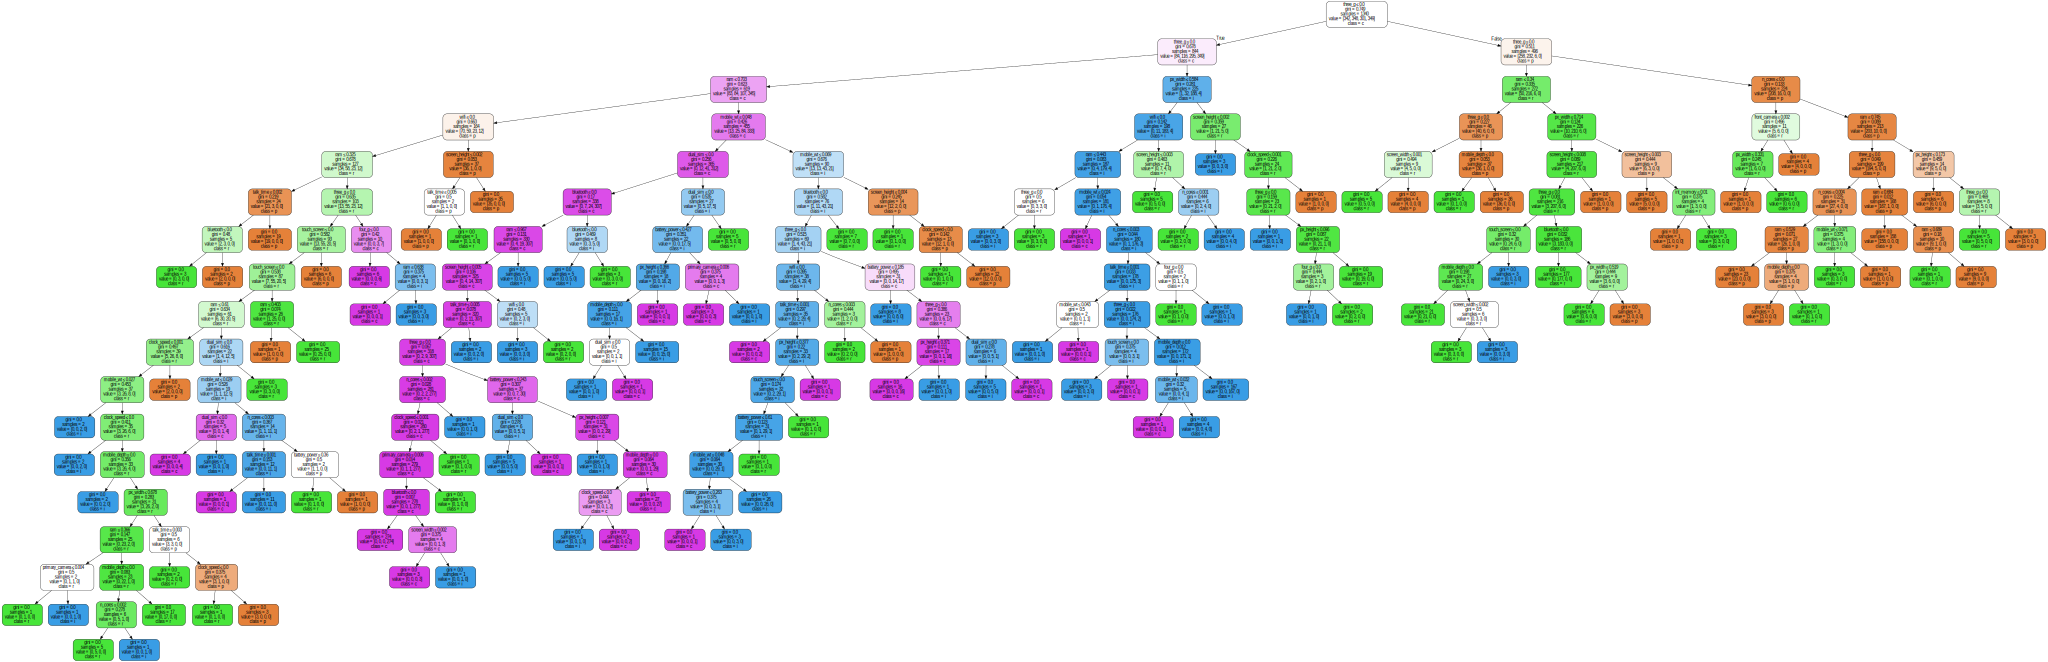

In [114]:
exported_tree = tree.export_graphviz(model, 
                                     feature_names = ['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera', 
                                                      'four_g', 'int_memory', 'mobile_depth', 'mobile_wt', 'n_cores', 'primary_camera', 
                                                      'px_height', 'px_width', 'ram', 'screen_height', 'screen_width', 'talk_time', 
                                                      'three_g', 'touch_screen', 'wifi'],  
                                     class_names = label,  
                                     filled = True, rounded = True,  
                                     special_characters = True)

tree_plot = graphviz.Source(exported_tree)  
tree_plot


In [31]:
# generate tree as PDF
tree_plot.render('color_tree2_dt')

'color_tree2_dt.pdf'